# DSC530 - Final Term Project
## Janine Par 

In [1]:
import numpy as np  
import pandas as pd  

import sys
from operator import itemgetter

import first
import thinkstats2

import json
import datetime
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 800)


# Business Data

### Get Restaurant Data

In [2]:
bus = pd.read_json("yelp_academic_dataset_business.json", lines=True)
bus.columns.values
#bus.categories.value_counts().sort_index()

array(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'], dtype=object)

In [3]:
#Filter out null categories then get only categories like restraurant, food and bar
bus= bus[~bus['categories'].isnull()]
bus_rest = bus.query('categories.str.contains("Restaurants") or categories.str.contains("Food")', engine='python')
bus_rest.categories
bus_rest.shape

(64616, 14)

### Star Rating 

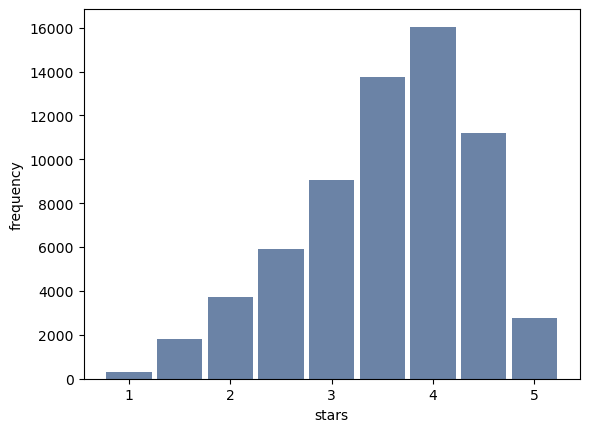

In [4]:
hist_rc = thinkstats2.Hist(bus_rest.stars)
import thinkplot
thinkplot.Hist(hist_rc)
thinkplot.Config(xlabel='stars', ylabel='frequency')

In [6]:
stars_mean=bus_rest.stars.mean()
stars_var=bus_rest.stars.var()
stars_std=bus_rest.stars.std()

stars_mean, stars_var, stars_std

(3.54595610994181, 0.7291771776143263, 0.8539187183885398)

### Review Count

In [10]:
bus_rest.describe()


,latitude,longitude,stars,review_count,is_open,attribute_count
count,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000
mean,36.969131,-88.095324,3.545956,76.614089,0.689953,5.894175
std,6.019271,14.024538,0.853919,173.383983,0.462516,3.053842
min,27.564457,-120.083748,1.000000,5.000000,0.000000,0.000000
25%,32.207349,-90.247145,3.000000,12.000000,0.000000,4.000000
50%,39.479423,-86.048171,3.500000,28.000000,1.000000,6.000000
75%,39.958128,-75.346978,4.000000,75.000000,1.000000,8.000000
max,53.679197,-74.661348,5.000000,7568.000000,1.000000,17.000000


### Get the number of Features or Attribute that is true for the establishment

In [9]:
    attributes_count = []
    for idx, row in bus_rest['attributes'].iteritems():
        att_count = 0
        if row is None:
             attributes_count.append(att_count) #This is to Handle rows without Attributes or column is NonType
        else:
            for i in row:
                if row[i] == "True":
                    att_count = att_count + 1
                    #print(att_count)
            attributes_count.append(att_count)
    bus_rest['attribute_count']=attributes_count    

C:\Users\janin\AppData\Local\Temp\ipykernel_3728\3678255082.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_rest['attribute_count']=attributes_count


### attribute_count histogram

### Get Price Range 

In [11]:
RestaurantsPriceRange2=[]
for idx, row in bus_rest['attributes'].iteritems():
    if row is None:
        RestaurantsPriceRange2.append(None) #This is to Handle rows without Attributes or column is NonType
    else:
        l=row.keys()
        if 'RestaurantsPriceRange2' in l:
            RestaurantsPriceRange2.append(row['RestaurantsPriceRange2'])
        else:
            RestaurantsPriceRange2.append(None)
     
bus_rest['RestaurantsPriceRange2']=RestaurantsPriceRange2

C:\Users\janin\AppData\Local\Temp\ipykernel_3728\3203000271.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_rest['RestaurantsPriceRange2']=RestaurantsPriceRange2


# CHECK-IN DATA

In [12]:
df_checkin = pd.read_json("yelp_academic_dataset_checkin.json", lines=True)
print(df_checkin.columns.values)

['business_id' 'date']


### Count the number of checkin date from the date fields which is comma delimited

In [13]:
df_checkin.head()

# Get the count of check-in date
df_checkin['checkin_count'] = df_checkin.date.str.count(',') 

#Validate if correct 
df_checkin[df_checkin.business_id=='el83zfEgg_5bBz5Et9rZ6Q']    

,business_id,date,checkin_count
87962,el83zfEgg_5bBz5Et9rZ6Q,"2019-12-24 00:14:38, 2020-03-08 18:44:04, 2020-03-08 18:44:38, 2020-04-03 21:59:24, 2020-04-21 23:05:03, 2020-08-27 21:47:02, 2020-09-13 22:00:34, 2020-10-10 22:44:51, 2021-02-22 23:26:57, 2021-03-21 18:53:10, 2021-04-09 23:38:36, 2021-04-27 22:13:12, 2021-05-07 23:36:26, 2021-06-04 18:15:18, 2021-06-30 22:41:55, 2021-07-02 21:35:04, 2021-07-04 19:47:17, 2021-09-12 23:24:59",17


Join to get the business details

Get the Checkin Date

In [18]:
df_checkin_bus_yr = df_checkin_bus.assign(date=df_checkin.date.str.split(",")).explode('date')

df_checkin_bus_yr.head(2)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None


Add Year Column from the checkin date

In [19]:
df_checkin_bus_yr['yyyy']=pd.to_datetime(df_checkin_bus_yr['date']).dt.year

df_checkin_bus_yr.head(2)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2,yyyy
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None,2020
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None,2020


# TIP DATA

In [21]:
tip = pd.read_json("yelp_academic_dataset_tip.json", lines=True)
print(tip.columns.values)

['user_id' 'business_id' 'text' 'date' 'compliment_count']


In [22]:
tip=tip.join(bus_rest.set_index('business_id'), on='business_id', how='inner')
tip.shape

(718687, 20)

In [156]:
tip.head(1)

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1


In [23]:
tip['Year_Tip']=pd.to_datetime(tip['date']).dt.year

tip.head()

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2,Year_Tip
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2013
2956,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2012
10197,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2012
12900,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban sandwich. You can smell

Get the Tip Count per business